# Notas de Gonche

In [1]:
from simulator.population_networks.generic.population_network_from_hdx import PopulationNetworkFromHDX
from simulator.disasters.specific.drill_earthquake import DrillEarthQuake
from simulator.population_networks.specific.panama_costarica_zoom import PanamaCostaRicaZoom
import simulator.constants as con
import simulator.utils.general as gen_fun


import geopandas as gpd
import numpy as np
from shapely.geometry import Point, LineString
from datetime import datetime, timedelta

from simulator.simulations.specific.PanamaDrill import PanamaDrill


   Reading nodes from Cache
   Reading edges from Cache
2023-02-28 00:00:00
   Population in area of interest: 5947
   Generating Disaster
      Number of steps to compute: 58 hr
   Disaster has not started
2023-02-28 04:00:00
   Population in area of interest: 4603
   Disaster has not started
2023-02-28 08:00:00
   Population in area of interest: 3260
   Disaster has not started
2023-02-28 12:00:00
   Population in area of interest: 3734
   Disaster has not started
2023-02-28 16:00:00
   Population in area of interest: 2890
   Disaster has not started
2023-02-28 20:00:00
   Population in area of interest: 3157
   Disaster has not started
2023-03-01 00:00:00
   Population in area of interest: 2506
   Disaster has not started
2023-03-01 04:00:00
   Population in area of interest: 2641
   Disaster has not started
2023-03-01 08:00:00
   Population in area of interest: 2290
   Disaster has not started
2023-03-01 12:00:00
   Population in area of interest: 2314
   Disaster has not started
2

/home/minigonche/Dropbox/Projects/synthetic_mobility_data_generator/env/lib/python3.10/site-packages/geopandas/plotting.py:675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


2023-03-03 12:00:00
   Population in area of interest: 43
   Min Force: 1.4392   Max Force: 2.9993
2023-03-03 16:00:00
   Population in area of interest: 8
   Min Force: 1.4392   Max Force: 2.9993
2023-03-03 20:00:00
   Population in area of interest: 20
   Min Force: 1.4392   Max Force: 2.9993
2023-03-04 00:00:00
   Population in area of interest: 4
   Min Force: 1.4392   Max Force: 2.9993
2023-03-04 04:00:00
   Population in area of interest: 10
   Min Force: 1.4392   Max Force: 2.9993
2023-03-04 08:00:00
   Population in area of interest: 3
   Min Force: 1.4392   Max Force: 2.9993
2023-03-04 12:00:00
   Population in area of interest: 3
   Min Force: 1.4392   Max Force: 2.9993
2023-03-04 16:00:00
   Population in area of interest: 1
   Min Force: 1.4392   Max Force: 2.9993
2023-03-04 20:00:00
   Population in area of interest: 3
   Min Force: 1.4392   Max Force: 2.9993
2023-03-05 00:00:00
   Population in area of interest: 1
   Min Force: 1.4392   Max Force: 2.9993
2023-03-05 04:00:

KeyboardInterrupt: 

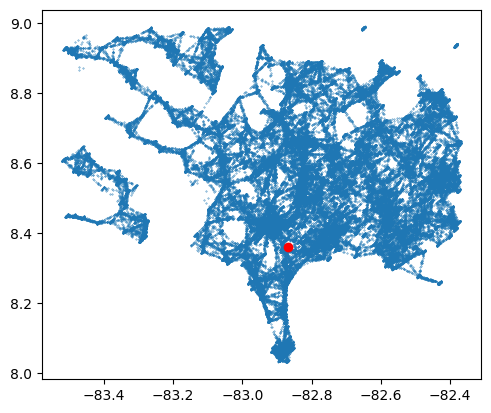

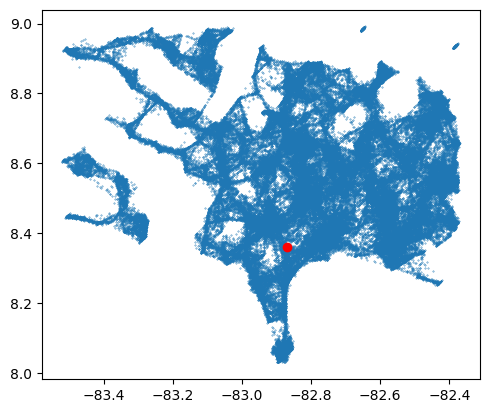

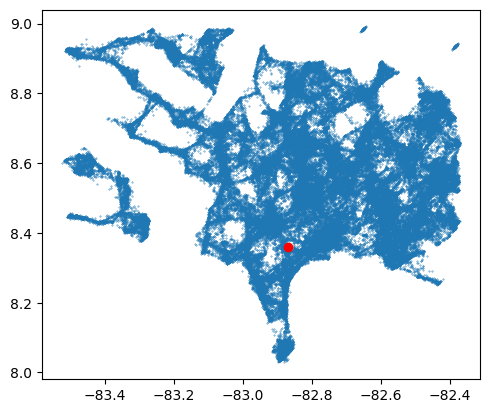

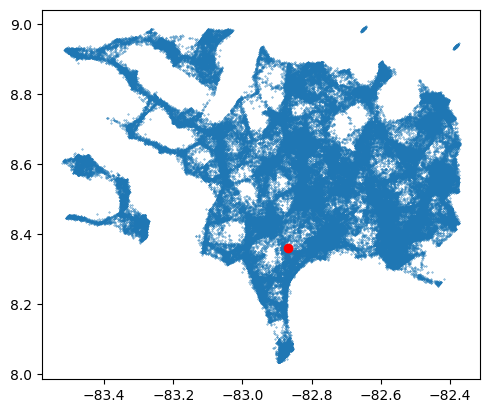

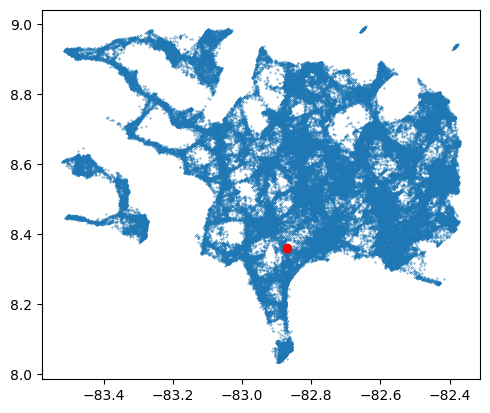

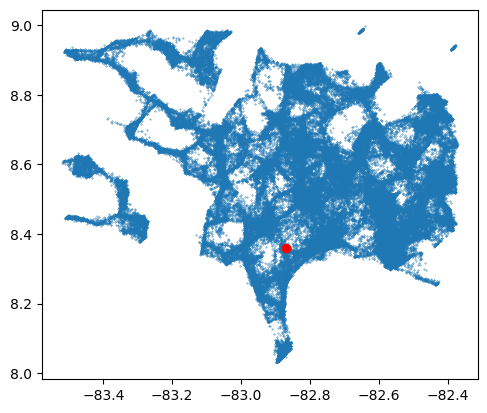

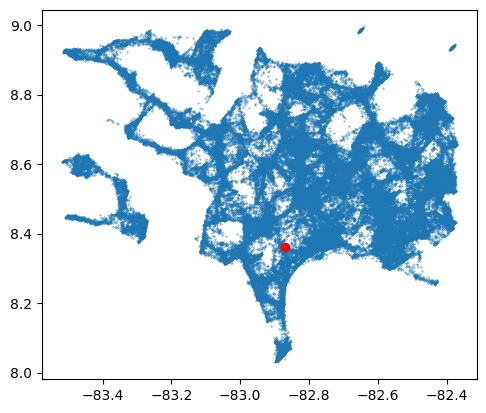

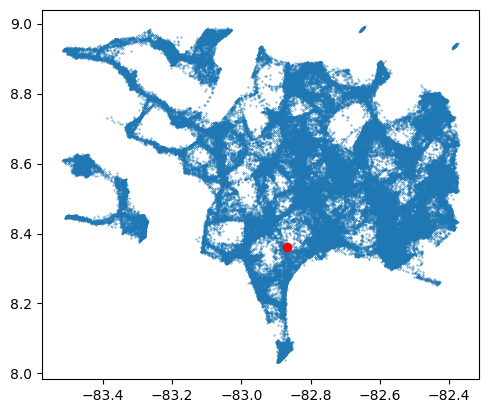

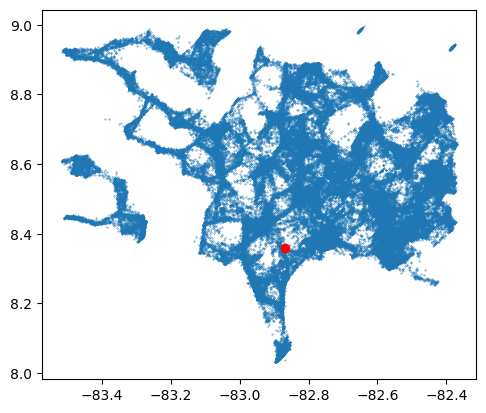

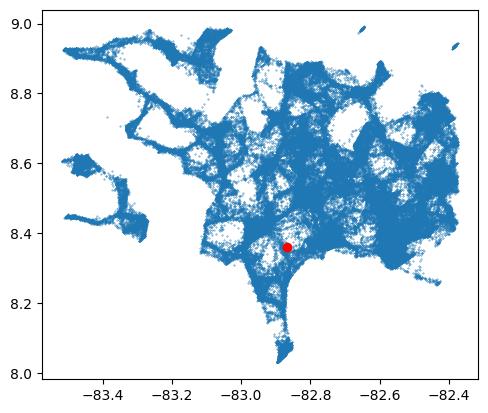

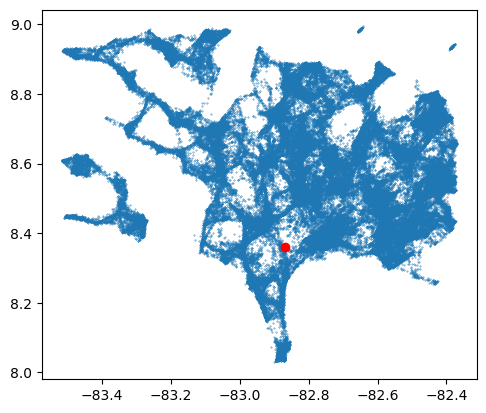

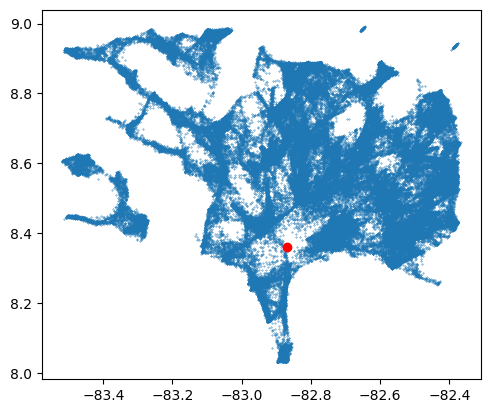

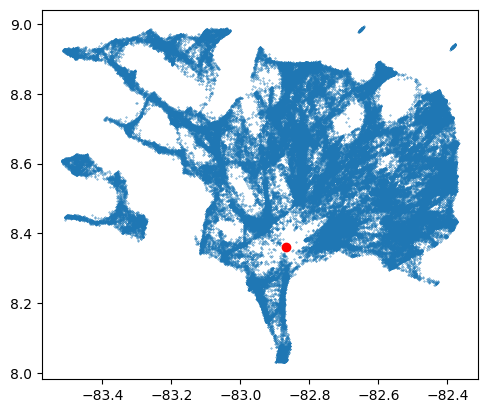

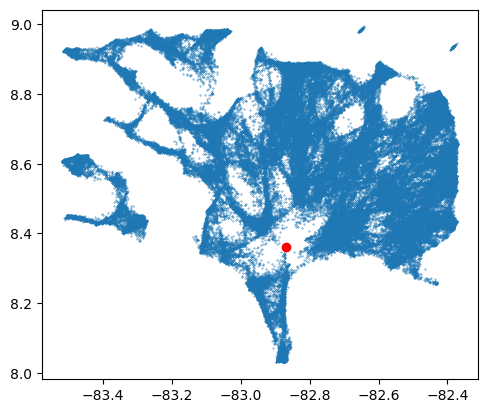

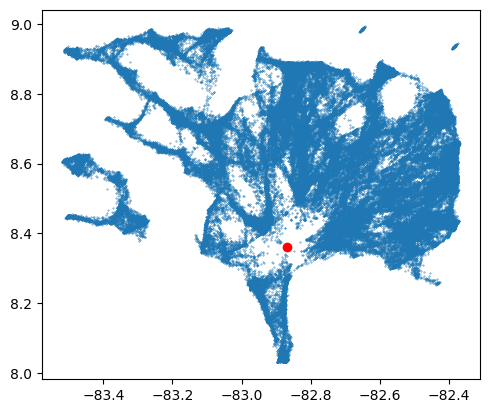

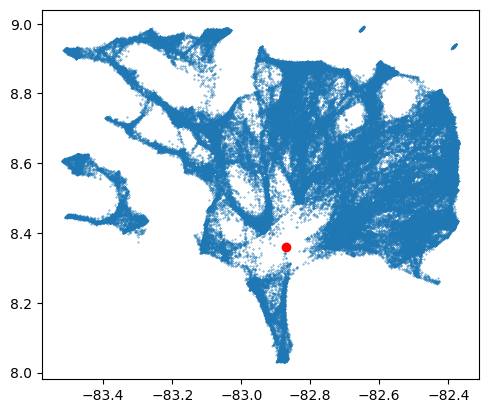

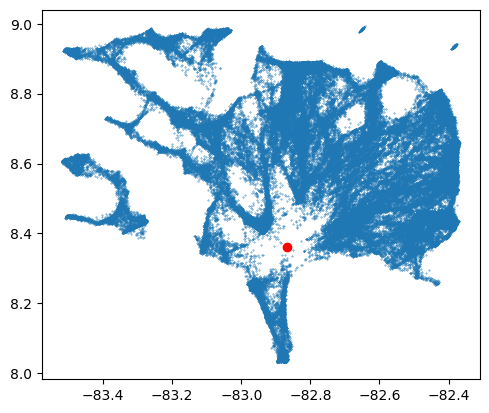

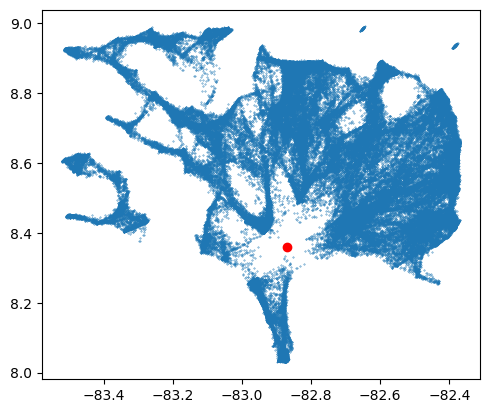

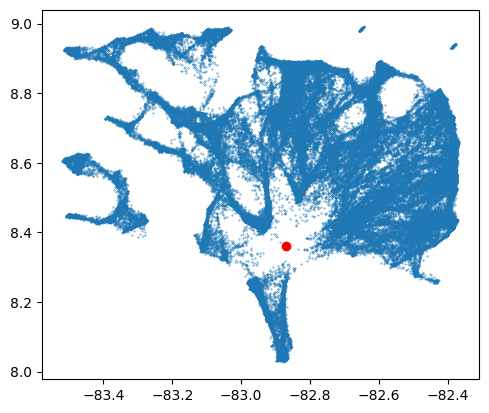

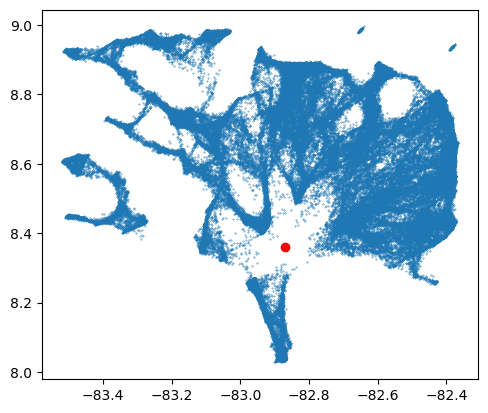

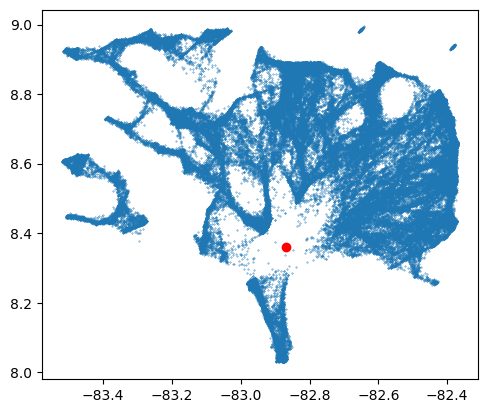

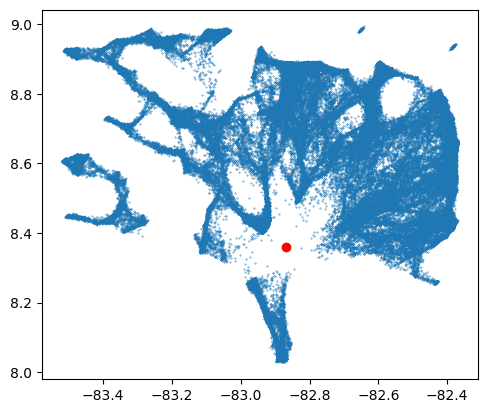

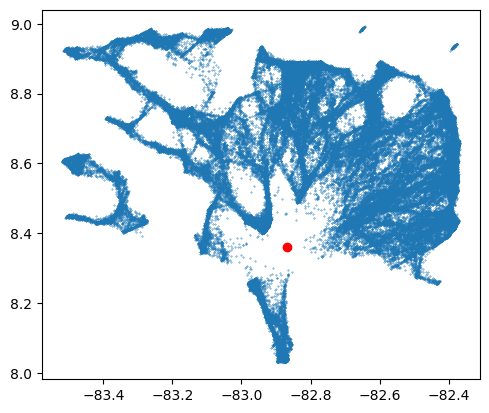

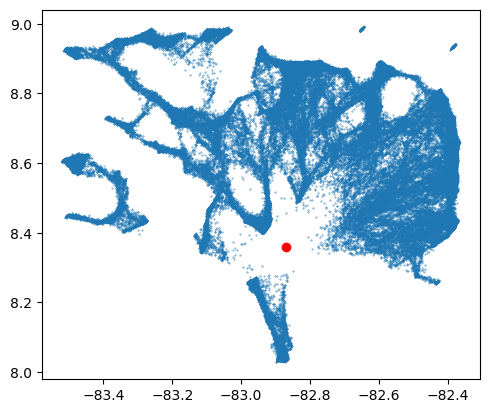

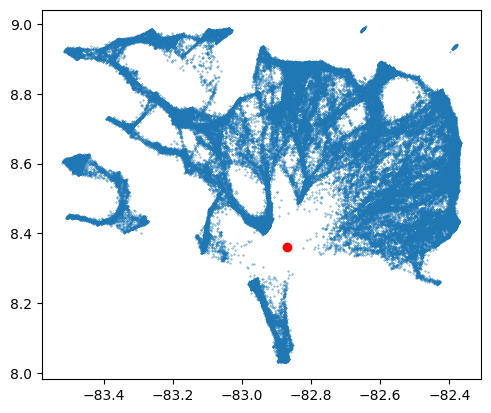

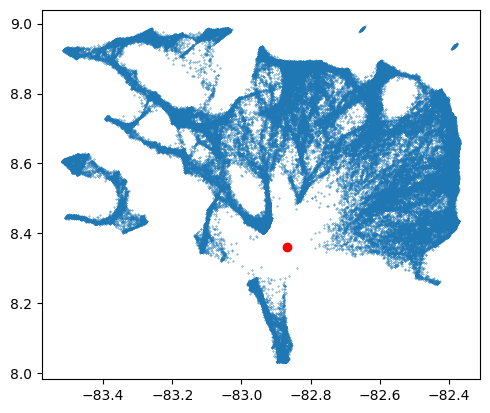

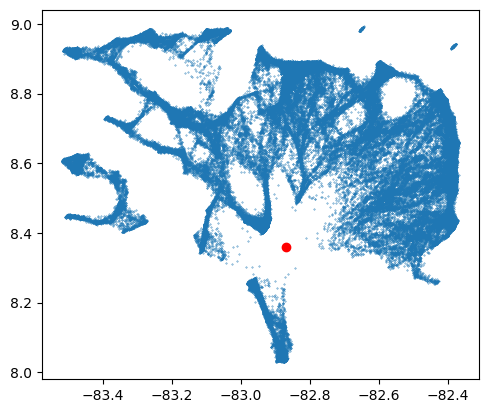

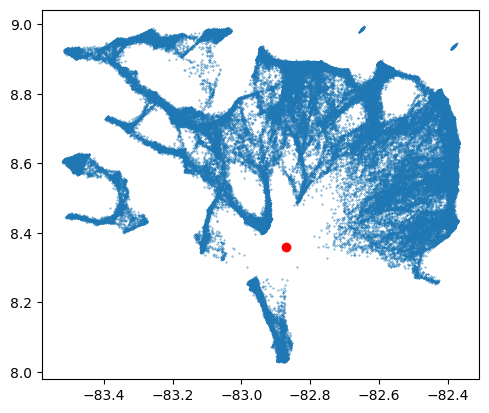

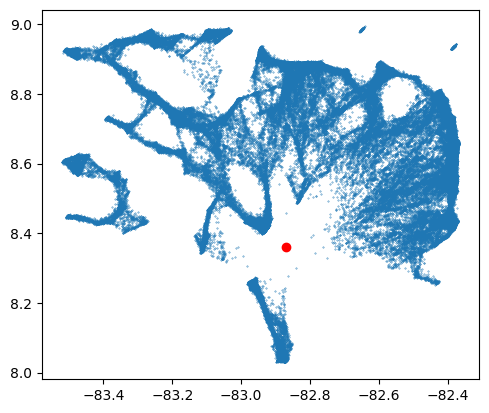

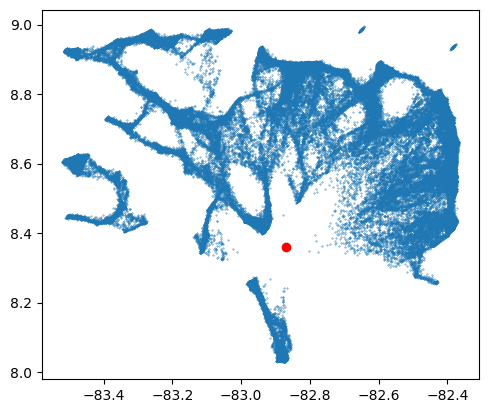

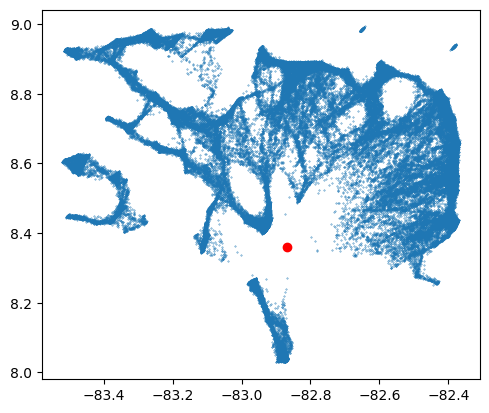

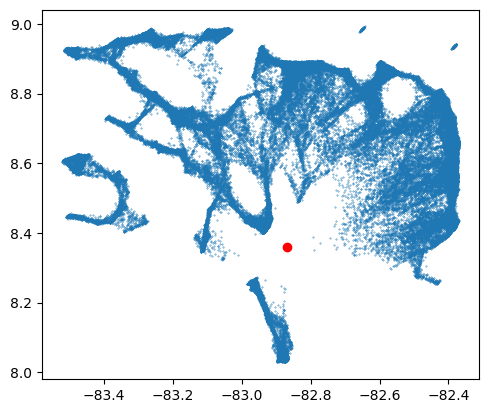

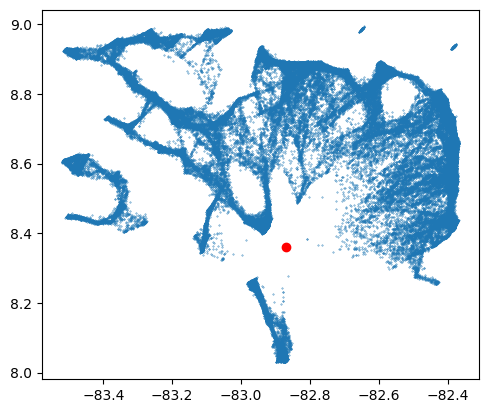

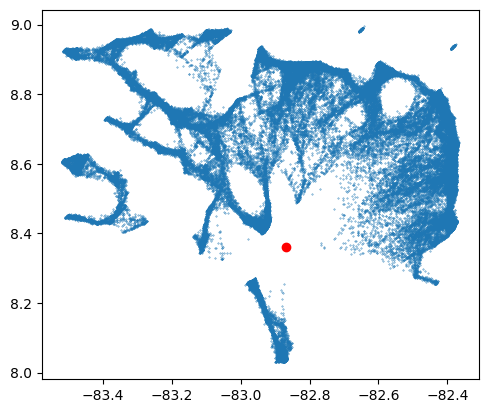

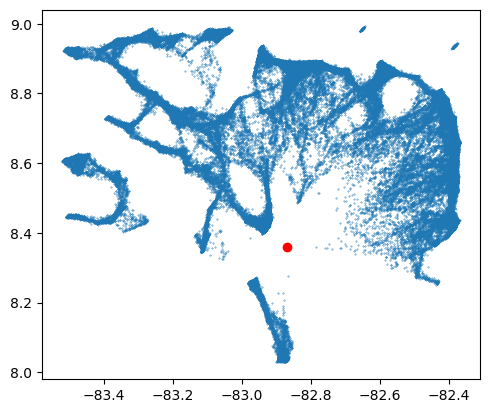

In [2]:
drill = PanamaDrill()
drill.simulate()

In [3]:
import numpy as np
import simulator.constants as con
import pandas as pd
from scipy.special import expit
import geopandas as gpd
from datetime import datetime, timedelta
import os

In [4]:

# Extracts Neighbors
adjacent_nodes = {}

for node_id in population_network.nodes[con.ID]:
    
    # Creates the slice
    neighbors = set([node_id])

    # Node 1
    try:
        neighbors = neighbors.union(population_network.edges.loc[pd.IndexSlice[node_id, :], con.NODE_ID2].values)
    except KeyError:
        pass

    # Node 2
    try:
        neighbors = neighbors.union(population_network.edges.loc[pd.IndexSlice[:,node_id], con.NODE_ID1].values)
    except KeyError:
        pass

    adjacent_nodes[node_id] = list(neighbors)

# Starts Simulation

# Percentage of Population with coverage
population_with_coverage = 0.3

total_elements = int(np.round(population_with_coverage*population_network.nodes[con.POPULATION].sum()))

ids = np.array([i for i in range(total_elements)])

# Creates ID
device_positions = population_network.initial_sample(ids)

device_trajectories = device_positions.rename(columns = {con.NODE_ID : con.START_NODE})

device_trajectories[con.END_NODE] = device_trajectories[con.START_NODE]

device_trajectories


   Reading nodes from Cache
   Reading edges from Cache


id           start_node        lon       lat             end_node
0            0         Bonilla_3774 -82.541810  8.607431         Bonilla_3774
1            1  Bajo Coto Brus_1511 -83.074869  8.946968  Bajo Coto Brus_1511
2            2          Sábalo_1889 -83.039590  8.987912          Sábalo_1889
3            3          Cenizo_3460 -82.936110  8.447753          Cenizo_3460
4            4     Santa Elena_4818 -82.532365  8.728847     Santa Elena_4818
...        ...                  ...        ...       ...                  ...
146159  146159        El Carmen_908 -82.901118  8.604739        El Carmen_908
146160  146160       Chiqueros_2786 -82.991598  8.724362       Chiqueros_2786
146161  146161     Los Palomos_4813 -82.480345  8.599933     Los Palomos_4813
146162  146162       Las Nubes_5074 -82.599655  8.890929       Las Nubes_5074
146163  146163      Alto Pavón_1013 -82.828564  8.596830      Alto Pavón_1013

[146164 rows x 5 columns]

   Generating Disaster
      Number of steps to compute: 58 hr


In [6]:
tracking_node_id = "Finca Corredor_3489"
tracking_set = set(adjacent_nodes[tracking_node_id])



tracking_set = set(population_network.nodes.sort_values("dist").head(40)[con.ID].values)

#tracking_set = set([tracking_node_id])


disaster_on = False

def extract_destination_node(df):
    '''
    Extracts the next nodes for the current node
    '''

    node_id = df[con.START_NODE].iloc[0]

    forces = population_network.nodes.loc[adjacent_nodes[node_id],[con.FINAL_FORCE]]

    if disaster_on:
        forces[con.FINAL_FORCE] = forces[con.FINAL_FORCE].apply(expit)

    # Top 3
    forces = forces.sort_values( by = con.FINAL_FORCE, ascending = False).head(min(5, forces.shape[0]))

    #if node_id in tracking_set or len(tracking_set.intersection(forces.index.values)) > 0:
    #    print(node_id)
    #    display(forces)

    forces[con.FINAL_FORCE] /= forces[con.FINAL_FORCE].sum()


    new_positions = np.random.choice(forces.index.values, df.shape[0],
              p= forces[con.FINAL_FORCE].values)

    return pd.DataFrame({con.ID : df.index, con.START_NODE : node_id, con.END_NODE : new_positions}, index = df.index)


# Updates flow and nodes
population_network.update_flow()
nodes = population_network.nodes


# Initializes movement (all devices are in nodes) 
device_trajectories = device_trajectories[[con.START_NODE]].groupby(con.START_NODE).apply(extract_destination_node).droplevel(0)

device_trajectories[con.LON] = nodes.loc[device_trajectories[con.START_NODE], con.LON].values
device_trajectories[con.LAT] = nodes.loc[device_trajectories[con.START_NODE], con.LAT].values

device_positions[con.LON] = device_trajectories[con.LON] 
device_positions[con.LAT] = device_trajectories[con.LAT] 


1 of 5
   Population in area of interest: 5998
   Min Force: 1.4392   Max Force: 2.9993
2 of 5
   Population in area of interest: 4453
   Min Force: 1.4392   Max Force: 2.9993
3 of 5
   Population in area of interest: 79
   Min Force: 1.4392   Max Force: 2.9993
4 of 5
   Population in area of interest: 2126
   Min Force: 1.4392   Max Force: 2.9993
5 of 5
   Population in area of interest: 41
   Min Force: 1.4392   Max Force: 2.9993


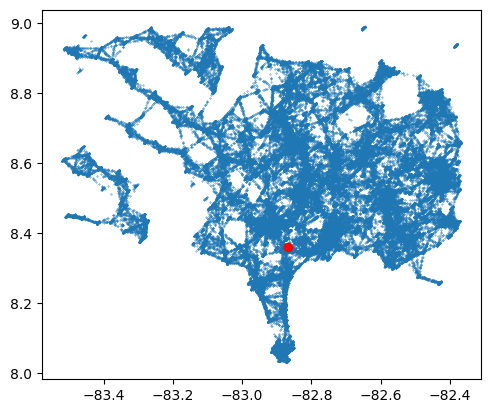

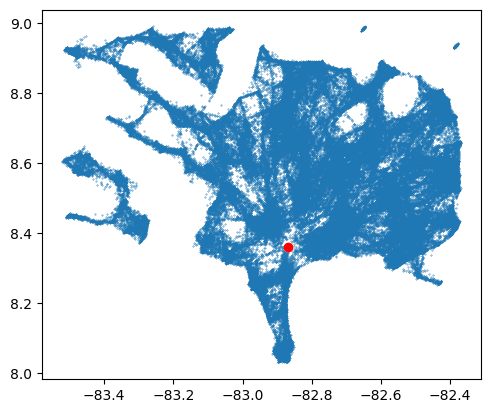

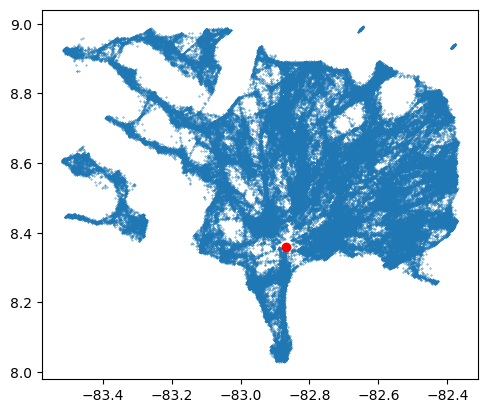

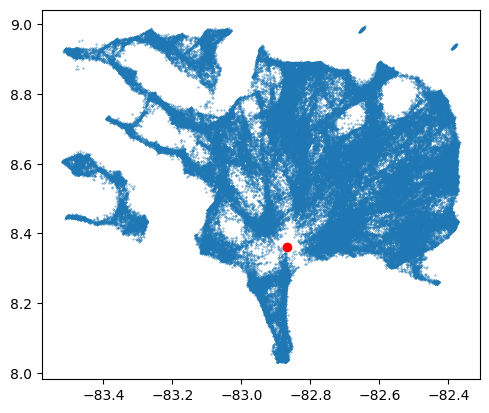

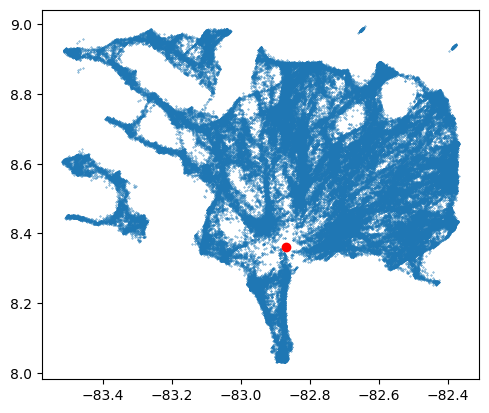

In [7]:
export_folder = "/home/minigonche/Dropbox/Projects/synthetic_mobility_data_generator/data/results/disaster_zoom"

center = pd.DataFrame({con.LON : [-82.869058], con.LAT :[8.360193]})
center = gpd.GeoDataFrame(center, geometry = center.apply(lambda row : Point(row.lon, row.lat) , axis = 1), crs = con.USUAL_PROJECTION)


current_date = disaster.start_date + timedelta(hours=2.5)

hours = 3
iterations = 5

disaster_on = False
for i in range(iterations):

    print(f"{i+1} of {iterations}")
    
    print(f"   Population in area of interest: { device_positions[device_positions[con.NODE_ID].isin(tracking_set)].shape[0]}")

    # Updates nodes
    fun = disaster.get_function_by_date(current_date)

    if fun is None:
        population_network.update_flow()
        print("   Disaster has not started")
    else:
        disaster_on = True
        # Extracts Forces
        force = fun.intensity(population_network.nodes.apply(lambda row : (row[con.LON], row[con.LAT]), axis=1))
        print(f"   Min Force: {np.round(np.min(force),4)}   Max Force: {np.round(np.max(force),4)}")
        population_network.update_flow(force = force)

    # Divides in two
    node_trajectories = device_trajectories[device_trajectories[con.START_NODE] == device_trajectories[con.END_NODE]]
    edge_trajectories = device_trajectories[device_trajectories[con.START_NODE] != device_trajectories[con.END_NODE]].copy()


    # Process node trajectories
    # --------------------------
    new_edge_trajectories = node_trajectories[[con.START_NODE]].groupby(con.START_NODE).apply(extract_destination_node).droplevel(0)

    # Process edge trajectories
    # --------------------------
    # Two modes
    if disaster_on:
        edge_trajectories[con.REACH_PROBABILITY] = nodes.loc[edge_trajectories[con.END_NODE], con.FINAL_FORCE].apply(expit).values
        edge_trajectories[con.REACH_PROBABILITY] /= ( edge_trajectories[con.REACH_PROBABILITY].values + nodes.loc[edge_trajectories[con.START_NODE], con.FINAL_FORCE].apply(expit)).values
    else:
        edge_trajectories[con.REACH_PROBABILITY] = nodes.loc[edge_trajectories[con.END_NODE], con.FINAL_FORCE].values
        edge_trajectories[con.REACH_PROBABILITY] /= edge_trajectories[con.REACH_PROBABILITY].values + nodes.loc[edge_trajectories[con.START_NODE], con.FINAL_FORCE].values

    random_vector = np.random.random(edge_trajectories.shape[0])

    # Devices that reach
    edge_trajectories.loc[random_vector <= edge_trajectories[con.REACH_PROBABILITY], con.START_NODE] = edge_trajectories[con.END_NODE]

    # Devices that don't
    edge_trajectories.loc[random_vector > edge_trajectories[con.REACH_PROBABILITY], con.END_NODE] = edge_trajectories[con.START_NODE]


    # Consolidates
    new_node_trajectories = edge_trajectories[[con.ID, con.START_NODE, con.END_NODE]]

    # Creates new frame
    new_device_trajectories = pd.concat((new_edge_trajectories, new_node_trajectories))

    new_device_positions = population_network.sample(device_positions, new_device_trajectories.loc[device_positions[con.ID], con.END_NODE].values)
    
    # Sets Date
    date_string = current_date.strftime("%m-%d-%Y_%H:%M:%S")
    new_device_positions[con.DATE] = date_string

    filename = f"{os.path.join(export_folder,date_string)}.csv"
    new_device_positions[[con.ID, con.DATE, con.LON, con.LAT]].to_csv(filename, index = False)

    # Advances
    device_positions = new_device_positions
    device_trajectories = new_device_trajectories

    current_date += timedelta(hours = hours)

    #display(new_device_trajectories[(new_device_trajectories.start_node == tracking_node_id) |(new_device_trajectories.end_node == tracking_node_id) ])


    ax = gpd.GeoDataFrame(device_positions, geometry = device_positions.apply(lambda row : Point(row.lon, row.lat) , axis = 1), crs = con.USUAL_PROJECTION).plot(markersize = 0.1)
    center.plot(color = "red", ax = ax)


In [8]:
population_network.nodes[population_network.nodes[con.ID].isin(tracking_set)]

id       lat   
id                                                                     
Asentamiento Almendro_962        Asentamiento Almendro_962  8.428443  \
Finca Higuito_3488                      Finca Higuito_3488  8.348996   
Finca Corredor_3489                    Finca Corredor_3489  8.345356   
Finca Blanco_3490                        Finca Blanco_3490  8.382777   
San Antonio_3491                          San Antonio_3491  8.371938   
Finca Bongo_3492                          Finca Bongo_3492  8.406808   
Berba_3507                                      Berba_3507  8.383347   
Finca Palmito #1_3516                Finca Palmito #1_3516  8.413590   
Finca Palmito Viejo_3517          Finca Palmito Viejo_3517  8.405173   
Burica Sur_3518                            Burica Sur_3518  8.388458   
Majagua Civil No. 2_3522          Majagua Civil No. 2_3522  8.338017   
San Bartolo Línea_3524              San Bartolo Línea_3524  8.312226   
Agua Buena_3525                            Agua Buena_3525  8.302404   
El Palmar_3526                              El Palmar_3526  8.304440   
Manaca Civil_3527                        Manaca Civil_3527  8.322695   
Manaca Norte_3528                        Manaca Norte_3528  8.334822   
Finca Lechoza_3535                      Finca Lechoza_3535  8.380114   
Finca Zapote_3536                        Finca Zapote_3536  8.375152   
Finca Jocote_3537                        Finca Jocote_3537  8.374741   
Finca Zapatero_3540                    Finca Zapatero_3540  8.397693   
Majagua Civil #1_3541                Majagua Civil #1_3541  8.355231   
San Bartolo Arriba_3543            San Bartolo Arriba_3543  8.321206   
Quebrada de Piedra_3545            Quebrada de Piedra_3545  8.301263   
Finca Ceiba_3576                          Finca Ceiba_3576  8.349804   
Finca Guayacán_3577                    Finca Guayacán_3577  8.348732   
Finca Malagueto_3578                  Finca Malagueto_3578  8.349515   
Aguacatón_3579                              Aguacatón_3579  8.347941   
Colorado_3595                                Colorado_3595  8.416464   
Finca María_3596                          Finca María_3596  8.424388   
Asentamiento Almendro_3598      Asentamiento Almendro_3598  8.428443   
Acueducto Almendro_3599            Acueducto Almendro_3599  8.419999   
Finca Aguacate_3600                    Finca Aguacate_3600  8.413433   
Burica Centro_3601                      Burica Centro_3601  8.393809   
Quebrada Arena_3602                    Quebrada Arena_3602  8.392658   
Rodolfo Aguilar Delgado_4392  Rodolfo Aguilar Delgado_4392  8.339164   
San Bartolo_4492                          San Bartolo_4492  8.313176   
Finca Malagueto Adentro_4507  Finca Malagueto Adentro_4507  8.357307   
Finca Majagua_4508                      Finca Majagua_4508  8.355023   
Blanco Arriba_4546                      Blanco Arriba_4546  8.369056   
Los Tecales_4630                          Los Tecales_4630  8.357599   

                                    lon  population   
id                                                    
Asentamiento Almendro_962    -82.875881       420.0  \
Finca Higuito_3488           -82.885727       500.0   
Finca Corredor_3489          -82.874371       500.0   
Finca Blanco_3490            -82.871611       500.0   
San Antonio_3491             -82.885808       500.0   
Finca Bongo_3492             -82.904314       500.0   
Berba_3507                   -82.813317       500.0   
Finca Palmito #1_3516        -82.875488       500.0   
Finca Palmito Viejo_3517     -82.863094       500.0   
Burica Sur_3518              -82.904668       500.0   
Majagua Civil No. 2_3522     -82.938490       500.0   
San Bartolo Línea_3524       -82.875838       500.0   
Agua Buena_3525              -82.872335       500.0   
El Palmar_3526               -82.838068       500.0   
Manaca Civil_3527            -82.818193       500.0   
Manaca Norte_3528            -82.807046       500.0   
Finca Lechoza_3535           -82.849388  

<Axes: >

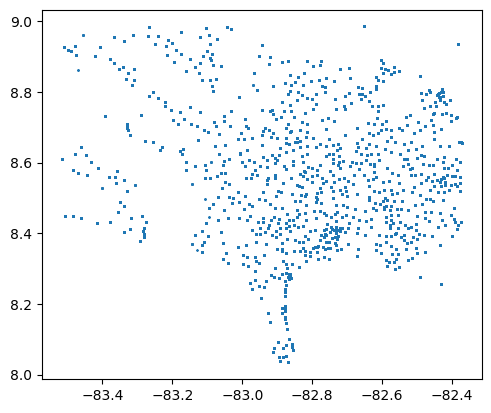

In [8]:
device_positions = population_network.initial_sample(ids)
gpd.GeoDataFrame(device_positions, geometry = device_positions.apply(lambda row : Point(row.lon, row.lat) , axis = 1), crs = con.USUAL_PROJECTION).plot(markersize = 0.1)


In [9]:
gpd.GeoDataFrame(device_positions, geometry = device_positions.apply(lambda row : Point(row.lon, row.lat) , axis = 1), crs = con.USUAL_PROJECTION).to_file("temp")

In [15]:
import math

latitude = 9  # Latitude of Panama

# Calculate the distance covered by 1 degree of latitude and longitude at the given latitude
lat_distance = 111  # Approximate distance covered by 1 degree of latitude (in km)
lon_distance = 111 * math.cos(math.radians(latitude))  # Approximate distance covered by 1 degree of longitude (in km)

print(f"1 km in Panama is approximately {1/lat_distance} degrees of latitude and {1/lon_distance} degrees of longitude.")


1 km in Panama is approximately 0.009009009009009009 degrees of latitude and 0.009121307439531557 degrees of longitude.


In [4]:
# Reads edges
edges = population_network.edges 

   Reading edges from Cache


In [43]:
import pandas as pd
import numpy as np
import geopandas as gpd

from shapely.geometry import Point, LineString

In [9]:
edges[con.ROAD_LENGTH] = edges[con.GEOMETRY].to_crs(con.MANIPULATION_PROJECTION).length/1000
edges[con.POPULATION] = edges[con.ROAD_LENGTH].apply(lambda l : min(1,int(np.round(l*con.ROAD_SAMPLE_DENSITY_BY_KM))))


In [26]:
# Gets the coordinates
edge_sample_constructor = edges[[con.GEOMETRY]].copy()
coords = edge_sample_constructor[con.GEOMETRY].apply(lambda geo : geo.coords).values


edge_sample_constructor[con.LON_X] = [coor[0][0] for coor in coords]
edge_sample_constructor[con.LAT_X] = [coor[0][1] for coor in coords]
edge_sample_constructor[con.LON_Y] = [coor[1][0] for coor in coords]
edge_sample_constructor[con.LAT_Y] = [coor[1][1] for coor in coords]

edge_sample_constructor = edge_sample_constructor[[con.LON_X, con.LAT_X, con.LON_Y, con.LAT_Y]].copy()


<Axes: >

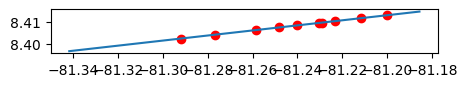

In [52]:
edge_id = edge_sample_constructor.index.values[np.random.randint(edge_sample_constructor.shape[0])]
num_points = 10

t = edge_sample_constructor.loc[[edge_id]*num_points]
vals = np.random.rand(sample_size)
t[con.LON] = t[con.LON_X]*vals + t[con.LON_Y]*(1-vals)
t[con.LAT] = t[con.LAT_X]*vals + t[con.LAT_Y]*(1-vals)

response = t[[con.LON, con.LAT]]

response = gpd.GeoDataFrame( response, geometry = response.apply(lambda row : Point(row.lon, row.lat) , axis = 1), crs = con.USUAL_PROJECTION)


ax = edges.loc[[edge_id]].plot(figsize=(5,5))
response.plot(ax = ax, color = "red")



In [7]:

# Iterates over the edges o construct sample points
print_iteration_progress = True
percentage_print = 0.1
batch = int(np.ceil(edges.shape[0]*percentage_print))


index_names = list(edges.index.names)

dfs = []
for ind, row in edges.iterrows():

    if print_iteration_progress and len(dfs) % batch == 0:
        print(f"         Progress: {np.round(100*len(dfs)/edges.shape[0])}%")

    coords = np.array(row.geometry.coords)

    sample_size = row[con.POPULATION]

    vals = np.random.rand(sample_size)

    lon = coords[0,0]*vals + coords[1,0]*(1-vals)
    lat = coords[0,1]*vals + coords[1,1]*(1-vals)

    df = pd.DataFrame({con.LON : lon, con.LAT: lat})

    df.index = pd.MultiIndex.from_tuples([ind]*sample_size, names=index_names)

    dfs.append(df)
    

sample_points = pd.concat(dfs)
sample_points



         Progress: 0.0%
         Progress: 10.0%


KeyboardInterrupt: 

In [5]:
from os.path import join
import simulator.constants as con
import simulator.utils.geometric as geo_fun
import geopandas as gpd
import networkx as nx
import pandas as pd
import numpy as np

world_pop_density_file = join(con.DATA_FOLDER,"costa_rica-panama/pd_2020_1km_ASCII_XYZ.csv")
populated_places_folder = join(con.DATA_FOLDER,"costa_rica-panama/hotosm_populated_places_points_shp")
road_lines_folder = join(con.DATA_FOLDER,"costa_rica-panama/hotosm_roads_lines_shp")
building_polygons_folder = join(con.DATA_FOLDER,"costa_rica-panama/hotosm_buildings_polygons_shp")

geometry       highway
0      MULTILINESTRING ((-84.14531 9.95885, -84.14520...       service
1      MULTILINESTRING ((-84.09124 9.94787, -84.09146...     secondary
2      MULTILINESTRING ((-84.11712 9.94019, -84.11713...    trunk_link
3      MULTILINESTRING ((-84.11646 9.93860, -84.11651...    trunk_link
4      LINESTRING (-84.11648 9.93629, -84.11643 9.936...    trunk_link
...                                                  ...           ...
57388  MULTILINESTRING ((-82.84401 8.69199, -82.84450...     bridleway
57389  MULTILINESTRING ((-82.82806 8.87898, -82.82830...  unclassified
57390  MULTILINESTRING ((-82.90799 8.44169, -82.90794...       footway
57391  LINESTRING (-82.90817 8.44242, -82.90773 8.44224)       footway
57392  MULTILINESTRING ((-83.00596 8.32457, -83.00586...         track

[57393 rows x 2 columns]

         Progress: 0.0%
         Progress: 10.0%
         Progress: 20.0%
         Progress: 30.0%
         Progress: 40.0%
         Progress: 50.0%
         Progress: 60.0%
         Progress: 70.0%
         Progress: 80.0%
         Progress: 90.0%


lon       lat
0     -84.143179  9.958370
0     -84.141287  9.958160
0     -84.143858  9.958684
0     -84.142863  9.959875
0     -84.144137  9.960139
...          ...       ...
57392 -84.144025  9.957689
57392 -84.143565  9.958053
57392 -84.143013  9.960531
57392 -84.142431  9.958819
57392 -84.142551  9.960412

[502873 rows x 2 columns]

In [48]:
# Assigns to the edges
bounds = edges[con.GEOMETRY].bounds


margin = con.ROADS_WIDTH_KM/DEGREE_EQUIVALENT_IN_KM

batch = int(np.ceil(bounds.shape[0]*percentage_print))

dfs = []
# Iterates over the bounds
for ind, row in bounds.iterrows():

    if print_iteration_progress and len(dfs) % batch == 0:
        print(f"         Progress: {np.round(100*len(dfs)/roads.shape[0])}%")

    # Filters
    points = sample_points_by_road[(sample_points_by_road[con.LON] <= (row.maxx + margin)) &
                                   (sample_points_by_road[con.LON] >= (row.minx - margin)) &
                                   (sample_points_by_road[con.LAT] <= (row.maxy + margin)) &
                                   (sample_points_by_road[con.LAT] >= (row.miny - margin))]
    #
    #points.index = ind

    dfs.append(points)


         Progress: 0.0%
         Progress: 211.0%


: 

: 

In [4]:
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import geopandas as gpd

lon        lat
Liberia_0                        -85.480060  10.565376
Liberia_0                        -85.483245  10.567046
Liberia_0                        -85.485343  10.567941
Liberia_0                        -85.485268  10.568108
Liberia_0                        -85.485731  10.568351
...                                     ...        ...
Refugio Migrantes El Abuelo_6442 -77.744189   8.648758
Refugio Migrantes El Abuelo_6442 -77.745199   8.647782
Refugio Migrantes El Abuelo_6442 -77.745269   8.647852
Refugio Migrantes El Abuelo_6442 -77.745345   8.647789
Refugio Migrantes El Abuelo_6442 -77.746215   8.648806

[277017 rows x 2 columns]

In [7]:
nodes = nodes.sample(100)

In [8]:
search_unit = 0.0018 # 200m in the equator

exploded_geometries = nodes.explode(index_parts=False)
exploded_geometries = exploded_geometries[[con.GEOMETRY]].copy()

dfs = []
for ind, row in exploded_geometries.iterrows():
    boundary = list(row.geometry.exterior.coords)
    dfs.append(pd.DataFrame({con.LON : [t[0] for t in boundary], con.LAT : [t[1] for t in boundary]}, index = [ind for _ in boundary]))

boundary_points = pd.concat(dfs)
boundary_points


# Sample point structure
sample_points = pd.DataFrame(columns=[con.ID, con.LON, con.LAT])


# Progress
progress = pd.DataFrame(columns=[con.ID, "count"])
progress = progress.merge(nodes[[con.ID, con.POPULATION]].reset_index(drop = True), how = "right").fillna(0)
progress["per"] = progress["count"] / progress[con.POPULATION]

# Filters
progress = progress[progress.per < 1]

sample_size = 100

print("Started Sampling")
while progress.shape[0] > 0:

    current_progress = np.round(100*(nodes.shape[0] - progress.shape[0])/nodes.shape[0],2)
    print(f"   Min Coverage: {np.round(100*progress.per.min(), 2)}%")
    print(f"   Constructing Samples for {progress.shape[0]} elements of {nodes.shape[0]} ({current_progress}%)")
    dfs = []
    batch = int(np.ceil(progress.shape[0]*0.25))

    sample_size = int(np.round(sample_size*1.1))

    print(f"   Sample Size: {sample_size}")
        
    for id, row in progress.iterrows():

        if len(dfs) % batch == 0:
            print(f"      Progress: {np.round(100*len(dfs)/progress.shape[0])}%")

        
        # Extracts valid points
        local_sample_points = boundary_points.loc[row[con.ID]]
        if row[con.ID] in sample_points.index:
            local_sample_points = pd.concat((local_sample_points, sample_points.loc[row[con.ID],[con.LON, con.LAT]]))

        
        local_sample_points = local_sample_points.sample(sample_size, replace = True)

        # Adds Noise
        local_sample_points[con.LON] += np.random.uniform(-1*search_unit, search_unit, local_sample_points.shape[0])
        local_sample_points[con.LON] = np.round(local_sample_points[con.LON],5)

        local_sample_points[con.LAT] += np.random.uniform(-1*search_unit, search_unit, local_sample_points.shape[0])
        local_sample_points[con.LAT] = np.round(local_sample_points[con.LAT],5)
        
        local_sample_points[con.GEOMETRY] = local_sample_points.apply(lambda row: Point(row[con.LON], row[con.LAT]), axis = 1)

        dfs.append(local_sample_points)


    print("      Done")

    possible_sample_points = pd.concat(dfs, ignore_index=True)
    possible_sample_points = gpd.GeoDataFrame(possible_sample_points, geometry= con.GEOMETRY, crs = con.USUAL_PROJECTION)


    print("   Filtering")
    inter = nodes[[con.ID, con.GEOMETRY]].sjoin(possible_sample_points[[con.GEOMETRY]])

    final_sample_points = inter[[con.ID, "index_right"]].merge(possible_sample_points, left_on = "index_right", right_index = True)
    final_sample_points = final_sample_points[[con.ID, con.LON, con.LAT]]

    # Joins
    sample_points = pd.concat((sample_points, final_sample_points))

    # Checks threshold
    progress = pd.DataFrame(sample_points[con.ID].value_counts()).reset_index()
    progress = progress.merge(nodes[[con.ID, con.POPULATION]].reset_index(drop = True), how = "right").fillna(0)
    progress["per"] = progress["count"] / progress[con.POPULATION]

    # Cleans
    sample_points = sample_points.reset_index(drop = True)
    under = sample_points.merge(progress.loc[progress.per <= 1,[con.ID]])

    over = sample_points.merge(progress.loc[progress.per > 1,[con.ID]])
    over = over.groupby(con.ID).apply(lambda df : df.sample(int(np.round(nodes.loc[df[con.ID].iloc[0], con.POPULATION])),replace=True))
    
    sample_points = pd.concat((under, over), ignore_index = True)
    sample_points.index = sample_points[con.ID]

    # Sets Progress
    progress = progress[progress.per < 1]


    print(f"Current Samples: {sample_points.shape[0]}")
    print("---------------")
    print("")


print("Finished Sampling")
print(f"Total Samples: {sample_points.shape[0]}")



Started Sampling
   Min Coverage: 0.0%
   Constructing Samples for 100 elements of 100 (0.0%)
   Sample Size: 110
      Progress: 0.0%
      Progress: 25.0%
      Progress: 50.0%
      Progress: 75.0%
      Done
   Filtering
Current Samples: 3538
---------------

   Min Coverage: 0.1%
   Constructing Samples for 98 elements of 100 (2.0%)
   Sample Size: 121
      Progress: 0.0%
      Progress: 26.0%
      Progress: 51.0%
      Progress: 77.0%
      Done
   Filtering
Current Samples: 9605
---------------

   Min Coverage: 0.21%
   Constructing Samples for 92 elements of 100 (8.0%)
   Sample Size: 133
      Progress: 0.0%
      Progress: 25.0%
      Progress: 50.0%
      Progress: 75.0%
      Done
   Filtering
Current Samples: 16793
---------------

   Min Coverage: 0.37%
   Constructing Samples for 77 elements of 100 (23.0%)
   Sample Size: 146
      Progress: 0.0%
      Progress: 26.0%
      Progress: 52.0%
      Progress: 78.0%
      Done
   Filtering
Current Samples: 23899
----------

<Axes: >

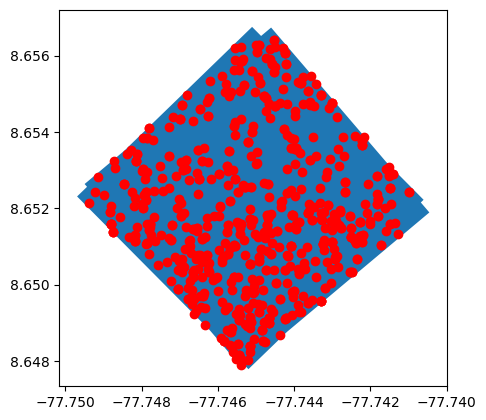

In [28]:
node = nodes.sample(1)

ax = node.plot(figsize=(5,5))

points = sample_points.loc[node[con.ID].iloc[0]].copy()
points[con.GEOMETRY] = points.apply(lambda row: Point(row[con.LON], row[con.LAT]), axis = 1)
points = gpd.GeoDataFrame(points, geometry = con.GEOMETRY)

points.plot(ax = ax, color = "red")


<Axes: >

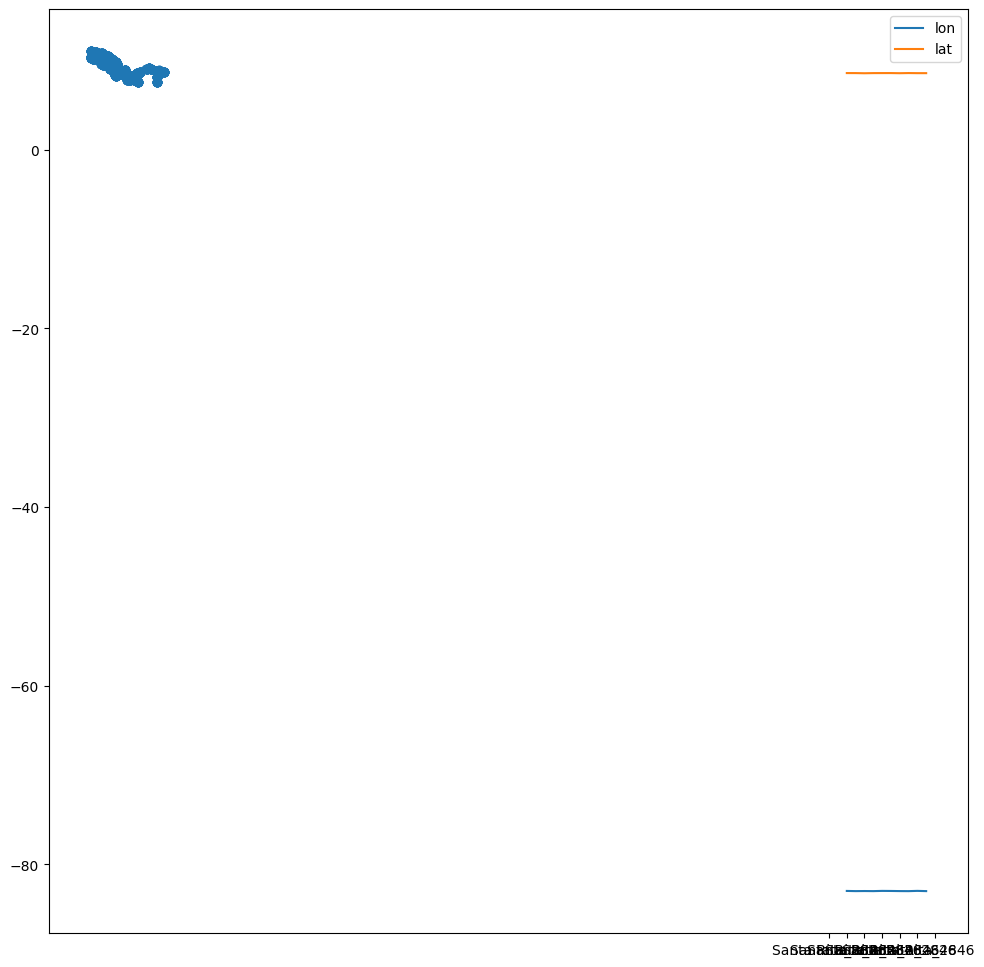

In [20]:
ax = local_sample_points.plot(figsize=(12,12))
possible_sample_points.plot(ax = ax)

In [ ]:
edge_id = population_network.edges.index.values[np.random.randint(population_network.edges.shape[0])]
num_points = 10

response = population_network.sample_from_edge(edge_id, num_points)
response = gpd.GeoDataFrame( response, geometry = response.apply(lambda row : Point(row.lon, row.lat) , axis = 1), crs = con.USUAL_PROJECTION)


ax = population_network.edges.loc[[edge_id]].plot(figsize=(5,5))
response.plot(ax = ax, color = "red")


In [ ]:
# Enhances
if current_progress <= 60:
    print("   Enhancing")
    valid_points = sample_points.merge(progress.loc[progress.per < 1, [con.ID]])
    valid_points = valid_points.drop(con.ID, axis=1)

    dfs = []
    num_iters = 10
    for i in range(num_iters):
        temp = valid_points.copy()
        temp[con.LON] += np.random.uniform(-1*search_unit, search_unit, temp.shape[0])
        temp[con.LAT] += np.random.uniform(-1*search_unit, search_unit, temp.shape[0])
        temp[con.GEOMETRY] = temp.apply(lambda row: Point(row[con.LON], row[con.LAT]), axis = 1)

        print(f"      Iteration {i+1} of {num_iters}")
        dfs.append(temp)


    possible_sample_points = pd.concat(dfs, ignore_index=True)
    possible_sample_points = gpd.GeoDataFrame(possible_sample_points, geometry= con.GEOMETRY, crs = con.USUAL_PROJECTION)

    inter = nodes[[con.ID, con.GEOMETRY]].sjoin(possible_sample_points[[con.GEOMETRY]])

    final_sample_points = inter[[con.ID, "index_right"]].merge(possible_sample_points, left_on = "index_right", right_index = True)
    final_sample_points = final_sample_points[[con.ID, con.LON, con.LAT]].reset_index(drop = True)

    # Joins
    sample_points = pd.concat((sample_points, final_sample_points), ignore_index=True)

    # Checks threshold
    progress = pd.DataFrame(sample_points[con.ID].value_counts()).reset_index()
    progress = progress.merge(nodes[[con.ID, con.POPULATION]].reset_index(drop = True), how = "right").fillna(0)
    progress["per"] = progress["count"] / progress[con.POPULATION]

id       lon       lat
0                 Liberia_0 -85.48113  10.56958
1                 Liberia_0 -85.45541  10.57188
2                 Liberia_0 -85.43387  10.62437
3                 Liberia_0 -85.42401  10.59706
4                 Liberia_0 -85.42418  10.59716
...                     ...       ...       ...
953381        La Unión_6056 -80.00231   9.32291
953382  Nuevo Porvenir_6061 -80.03780   9.10351
953383  Los Higuerones_6163 -82.30952   9.13878
953384    Isla Popa #2_6175 -82.15900   9.24060
953385    Isla Popa #2_6175 -82.15498   9.24239

[953386 rows x 3 columns]

In [ ]:
# Sample point structure
sample_points = pd.DataFrame(columns=[con.ID, con.LON, con.LAT])


# Progress
progress = pd.DataFrame(columns=[con.ID, "count"])
progress = progress.merge(nodes[[con.ID, con.POPULATION]].reset_index(drop = True), how = "right").fillna(0)
progress["per"] = progress["count"] / progress[con.POPULATION]

# Filters
progress = progress[progress.per < 1]

# Explodes
exploded_geometries = nodes.explode(index_parts=False)
bounds = exploded_geometries[con.GEOMETRY].bounds
bounds[con.GEOMETRY] = exploded_geometries[con.GEOMETRY]


print("Started Sampling")
while progress.shape[0] > 0:

    selected_bounds = bounds.loc[bounds.index.isin(progress[con.ID])]

    current_progress = np.round(100*progress.shape[0]/nodes.shape[0],2)
    print(f"   Min Coverage: {np.round(100*progress.per.min(), 2)}")
    print(f"   Constructing Samples for {progress.shape[0]} elements of {nodes.shape[0]} ({current_progress}%)")
    dfs = []
    batch = int(np.floor(selected_bounds.shape[0]*0.01))
        
    for id, row in selected_bounds.iterrows():

        if len(dfs) % batch == 0:
            print(f"      Progress: {np.round(100*len(dfs)/selected_bounds.shape[0])}%")

        #Random
        sample_size = 10
        local_sample_points = pd.DataFrame({con.LON : np.round(np.random.uniform(row.minx, row.maxx, sample_size),5), con.LAT : np.round(np.random.uniform(row.miny, row.maxy, sample_size), 5)})
        local_sample_points[con.GEOMETRY] = local_sample_points.apply(lambda row: Point(row[con.LON], row[con.LAT]), axis = 1)

        # From Boundary
        boundary = list(row.geometry.exterior.coords)
        boundary_sample_points = pd.DataFrame({con.LON : [t[0] for t in boundary], con.LAT : [t[0] for t in boundary]})
        boundary_sample_points = boundary_sample_points.sample(sample_size, replace = True)

        # Adds Noise
        boundary_sample_points[con.LON] += np.random.uniform(-1*search_unit, search_unit, boundary_sample_points.shape[0])
        boundary_sample_points[con.LON] = np.round(boundary_sample_points[con.LON],5)

        boundary_sample_points[con.LAT] += np.random.uniform(-1*search_unit, search_unit, boundary_sample_points.shape[0])
        boundary_sample_points[con.LAT] = np.round(boundary_sample_points[con.LAT],5)
        
        boundary_sample_points[con.GEOMETRY] = boundary_sample_points.apply(lambda row: Point(row[con.LON], row[con.LAT]), axis = 1)

        final_points = pd.concat((local_sample_points,), ignore_index = True)

        dfs.append(final_points)

    print("      Done")

    possible_sample_points = pd.concat(dfs, ignore_index=True)
    possible_sample_points = gpd.GeoDataFrame(possible_sample_points, geometry= con.GEOMETRY, crs = con.USUAL_PROJECTION)


    print("   Filtering")
    inter = nodes[[con.ID, con.GEOMETRY]].sjoin(possible_sample_points[[con.GEOMETRY]])

    final_sample_points = inter[[con.ID, "index_right"]].merge(possible_sample_points, left_on = "index_right", right_index = True)
    final_sample_points = final_sample_points[[con.ID, con.LON, con.LAT]].reset_index(drop = True)

    # Joins
    sample_points = pd.concat((sample_points, final_sample_points), ignore_index=True)

    # Checks threshold
    progress = pd.DataFrame(sample_points[con.ID].value_counts()).reset_index()
    progress = progress.merge(nodes[[con.ID, con.POPULATION]].reset_index(drop = True), how = "right").fillna(0)
    progress["per"] = progress["count"] / progress[con.POPULATION]

    # Cleans
    under = sample_points.merge(progress.loc[progress.per <= 1,[con.ID]])

    over = sample_points.merge(progress.loc[progress.per > 1,[con.ID]])
    over = over.groupby(con.ID).apply(lambda df : df.sample(int(np.round(nodes.loc[df[con.ID].iloc[0], con.POPULATION])),replace=True)).reset_index(drop = True)

    sample_points = pd.concat((under, over), ignore_index=True)

    # Sets Progress
    progress = progress[progress.per < 1]


    print(f"Current Samples: {sample_points.shape[0]}")
    print("---------------")
    print("")


print("Finished Sampling")
print(f"Total Samples: {sample_points.shape[0]}")



id        lat   
id                                                                              
Liberia_0                                                Liberia_0  10.633340  \
Tilarán_1                                                Tilarán_1  10.470980   
La Fortuna_2                                          La Fortuna_2  10.471684   
Limón_3                                                    Limón_3   9.993560   
Sixaola_4                                                Sixaola_4   9.505422   
...                                                            ...        ...   
Bajo La Concepción_6440                    Bajo La Concepción_6440   8.266004   
Alto de La Palma_6441                        Alto de La Palma_6441   8.246557   
Agua Viva_6442                                      Agua Viva_6442   8.217208   
El Bongo_6443                                        El Bongo_6443   7.920442   
Refugio Migrantes El Abuelo_6444  Refugio Migrantes El Abuelo_6444   8.652406   

                                        lon  population   
id                                                        
Liberia_0                        -85.436272     58726.0  \
Tilarán_1                        -84.967260     10366.0   
La Fortuna_2                     -84.644436      1935.0   
Limón_3                          -83.030314     19243.0   
Sixaola_4                        -82.614567      1592.0   
...                                     ...         ...   
Bajo La Concepción_6440          -81.312094       275.0   
Alto de La Palma_6441            -81.368233       314.0   
Agua Viva_6442                   -81.294220       301.0   
El Bongo_6443                    -80.462811       462.0   
Refugio Migrantes El Abuelo_6444 -77.744982       691.0   

                                                                           geometry  
id                                                                                   
Liberia_0                         MULTIPOLYGON (((-85.48115 10.56952, -85.48119 ...  
Tilarán_1                         MULTIPOLYGON (((-84.96930 10.46809, -84.96943 ...  
La Fortuna_2                      MULTIPOLYGON (((-84.64618 10.46989, -84.64619 ...  
Limón_3                           MULTIPOLYGON (((-83.03444 9.99205, -83.03437 9...  
Sixaola_4                         POLYGON ((-82.61344 9.50261, -82.61339 9.50247...  
...                                                                             ...  
Bajo La Concepción_6440           POLYGON ((-81.29862 8.26600, -81.29868 8.26470...  
Alto de La Palma_6441             POLYGON ((-81.35476 8.24656, -81.35482 8.24525...  
Agua Viva_6442                    POLYGON ((-81.28075 8.21721, -81.28081 8.21590...  
El Bongo_6443                     POLYGON ((-80.44650 7.91969, -80.44650 7.91969...  
Refugio Migrantes El Abuelo_6444  MULTIPOLYGON (((-77.74502 8.65232, -77.74493 8...  

[6443 rows x 5 columns]

In [ ]:
exploded = nodes.explode(index_parts=True)
exploded
    

id   
id                                                                     
Liberia_0                        0                         Liberia_0  \
                                 1                         Liberia_0   
                                 2                         Liberia_0   
                                 3                         Liberia_0   
                                 4                         Liberia_0   
...                                                              ...   
Alto de La Palma_6441            0             Alto de La Palma_6441   
Agua Viva_6442                   0                    Agua Viva_6442   
El Bongo_6443                    0                     El Bongo_6443   
Refugio Migrantes El Abuelo_6444 0  Refugio Migrantes El Abuelo_6444   
                                 1  Refugio Migrantes El Abuelo_6444   

                                          lat        lon  population   
id                                                                     
Liberia_0                        0  10.633340 -85.436272     58726.0  \
                                 1  10.633340 -85.436272     58726.0   
                                 2  10.633340 -85.436272     58726.0   
                                 3  10.633340 -85.436272     58726.0   
                                 4  10.633340 -85.436272     58726.0   
...                                       ...        ...         ...   
Alto de La Palma_6441            0   8.246557 -81.368233       314.0   
Agua Viva_6442                   0   8.217208 -81.294220       301.0   
El Bongo_6443                    0   7.920442 -80.462811       462.0   
Refugio Migrantes El Abuelo_6444 0   8.652406 -77.744982       691.0   
                                 1   8.652406 -77.744982       691.0   

                                                                             geometry  
id                                                                                     
Liberia_0                        0  POLYGON ((-85.48115 10.56952, -85.48119 10.569...  
                                 1  POLYGON ((-85.48142 10.56958, -85.48145 10.569...  
                                 2  POLYGON ((-85.48078 10.56966, -85.48080 10.569...  
                                 3  POLYGON ((-85.51192 10.60390, -85.51195 10.603...  
                                 4  POLYGON ((-85.50501 10.60687, -85.50487 10.606...  
...                                                                               ...  
Alto de La Palma_6441            0  POLYGON ((-81.35476 8.24656, -81.35482 8.24525...  
Agua Viva_6442                   0  POLYGON ((-81.28075 8.21721, -81.28081 8.21590...  
El Bongo_6443                    0  POLYGON ((-80.44650 7.91969, -80.44650 7.91969...  
Refugio Migrantes El Abuelo_6444 0  POLYGON ((-77.74502 8.65232, -77.74493 8.65231...  
                                 1  POLYGON ((-77.74510 8.65232, -77.74509 8.65222...  

[289221 rows x 5 columns]

In [ ]:

# Checks threshold
progress = pd.DataFrame(sample_points[con.ID].value_counts()).reset_index()
progress = progress.merge(nodes[[con.ID, con.POPULATION]].reset_index(drop = True), how = "right").fillna(0)
progress["per"] = progress["count"] / progress[con.POPULATION]

progress[progress.per == 0].sort_values(con.POPULATION)

id  count  population  per
5770  Los Planes del Barrero_5772    0.0        24.0  0.0
5761              El Naranjo_5763    0.0        44.0  0.0
5404                El Roble_5406    0.0        50.0  0.0
5489             Mi pueblito_5491    0.0        50.0  0.0
5421               Kamuakiro_5423    0.0        66.0  0.0
...                           ...    ...         ...  ...
1163                  Parque_1165    0.0      2194.0  0.0
5445                 Cañazas_5447    0.0      2288.0  0.0
4490                  Ustupu_4492    0.0      2502.0  0.0
6383        Familia Schapper_6385    0.0      2519.0  0.0
4726          Nance de Riscó_4728    0.0      4702.0  0.0

[120 rows x 4 columns]

<Axes: >

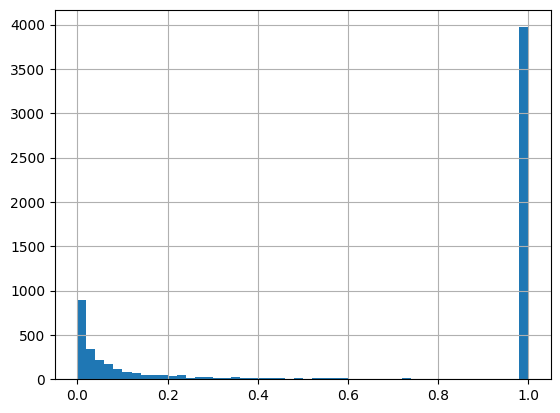

In [ ]:
progress.per.hist(bins = 50)

<Axes: >

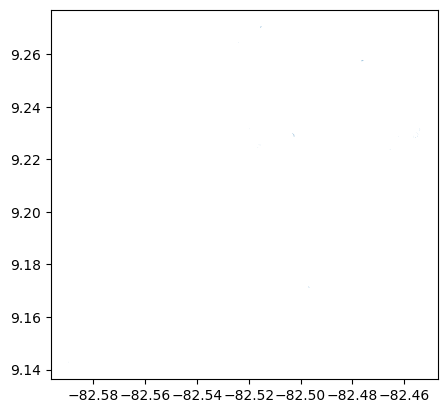

In [ ]:


node_id = "Nance de Riscó_4728"

nodes.loc[[node_id]].plot()

id  count
0                            Liberia_0  345.0
1                            Tilarán_1  453.0
2                         La Fortuna_2  158.0
3                              Limón_3  596.0
4                            Sixaola_4  880.0
...                                ...    ...
6438           Bajo La Concepción_6440  300.0
6439             Alto de La Palma_6441  252.0
6440                    Agua Viva_6442  399.0
6441                     El Bongo_6443  287.0
6442  Refugio Migrantes El Abuelo_6444  465.0

[6443 rows x 2 columns]

In [ ]:
import numpy as np
import simulator.constants as con
import pandas as pd
from scipy.special import expit
import geopandas as gpd

In [ ]:
# Assigns id as index for quick search
nodes.index = nodes[con.ID]
edges.index = pd.MultiIndex.from_tuples(edges.apply(lambda row: (row[con.NODE_ID1], row[con.NODE_ID2]), axis = 1), names=[con.NODE_ID1, con.NODE_ID2])

# Geometries

# Inverse
edges_inv = edges.rename(columns={con.NODE_ID1 : con.NODE_ID2, con.NODE_ID2 : con.NODE_ID1}) 
edges_inv = edges_inv.swaplevel(con.NODE_ID1, con.NODE_ID2)
edges_inv.index.names = [con.NODE_ID1, con.NODE_ID2]
edges_inv = edges_inv[[con.NODE_ID1, con.NODE_ID2, con.VALUE, con.GEOMETRY]]

# Self Loops
self_edges = gpd.GeoDataFrame({con.NODE_ID1 : nodes[con.ID], con.NODE_ID2 : nodes[con.ID], con.VALUE : 1}, geometry = nodes[con.GEOMETRY])
self_edges.index = pd.MultiIndex.from_tuples(self_edges.apply(lambda row: (row[con.NODE_ID1], row[con.NODE_ID2]), axis = 1), names=[con.NODE_ID1, con.NODE_ID2])


geometries = pd.concat((edges, edges_inv, self_edges))
geometries = gpd.GeoDataFrame(geometries, geometry = "geometry")


In [ ]:

# Starts Simulation

disaster_on = False


# Initializes the forces
nodes[con.ATTRACTIVE_FORCE] = nodes[con.POPULATION].values / nodes[con.POPULATION].sum()
nodes[con.ATTRACTIVE_FORCE] = nodes[con.ATTRACTIVE_FORCE]  / nodes[con.ATTRACTIVE_FORCE].max()
nodes[con.REPELLING_FORCE] = 0

# Computes final force
nodes[con.FINAL_FORCE] = nodes[con.ATTRACTIVE_FORCE] - nodes[con.REPELLING_FORCE]

# Percentage of Population with coverage
population_with_coverage = 0.3

total_elements = int(np.round(population_with_coverage*population_network.nodes[con.POPULATION].sum()))


# Creates ID
device_trajectories = pd.DataFrame({con.ID : [i for i in range(total_elements)]})

# All devices start at node
device_trajectories[con.START_NODE] = np.random.choice(nodes[con.ID].values, total_elements,
              p=nodes[con.POPULATION].values / nodes[con.POPULATION].sum())

device_trajectories[con.END_NODE] = device_trajectories[con.START_NODE]




In [ ]:
# Extracts Neighbors
adjacent_nodes = {}

for node_id in nodes[con.ID]:
    
    # Creates the slice
    neighbors = set([node_id])

    # Node 1
    try:
        neighbors = neighbors.union(edges.loc[pd.IndexSlice[node_id, :], con.NODE_ID2].values)
    except KeyError:
        pass

    # Node 2
    try:
        neighbors = neighbors.union(edges.loc[pd.IndexSlice[:,node_id], con.NODE_ID1].values)
    except KeyError:
        pass

    adjacent_nodes[node_id] = list(neighbors)


In [ ]:
# Creates the node step
new_positions = []


def extract_destination_node(df):
    '''
    Extracts the next nodes for the current node
    '''

    node_id = df[con.START_NODE].iloc[0]

    forces = nodes.loc[adjacent_nodes[node_id],[con.FINAL_FORCE]]

    if disaster_on:
        forces[con.FINAL_FORCE] = forces[con.FINAL_FORCE].apply(expit)


    forces[con.FINAL_FORCE] /= forces[con.FINAL_FORCE].sum()

    new_positions = np.random.choice(forces.index.values, df.shape[0],
              p= forces[con.FINAL_FORCE].values)

    return pd.DataFrame({con.ID : df.index, con.START_NODE : node_id, con.END_NODE : new_positions}, index = df.index)
    

# Initializes movement (all devices are in nodes) 
device_trajectories = device_trajectories[[con.START_NODE]].groupby(con.START_NODE).apply(extract_destination_node).droplevel(0)


# Divides in two
node_trajectories = device_trajectories[device_trajectories[con.START_NODE] == device_trajectories[con.END_NODE]]
edge_trajectories = device_trajectories[device_trajectories[con.START_NODE] != device_trajectories[con.END_NODE]].copy()


# Process node trajectories
new_edge_trajectories = node_trajectories[[con.START_NODE]].groupby(con.START_NODE).apply(extract_destination_node).droplevel(0)




In [ ]:

if disaster_on:
    edge_trajectories[con.REACH_PROBABILITY] = nodes.loc[edge_trajectories[con.END_NODE], con.FINAL_FORCE].apply(expit).values
    edge_trajectories[con.REACH_PROBABILITY] /= ( edge_trajectories[con.REACH_PROBABILITY] + nodes.loc[edge_trajectories[con.START_NODE], con.FINAL_FORCE].apply(expit)).values
else:
    edge_trajectories[con.REACH_PROBABILITY] = nodes.loc[edge_trajectories[con.END_NODE], con.FINAL_FORCE].values
    edge_trajectories[con.REACH_PROBABILITY] /= edge_trajectories[con.REACH_PROBABILITY].values + nodes.loc[edge_trajectories[con.START_NODE], con.FINAL_FORCE].values

random_vector = np.random.random(edge_trajectories.shape[0])

# Devices that reach
edge_trajectories.loc[random_vector <= edge_trajectories[con.REACH_PROBABILITY], con.START_NODE] = edge_trajectories[con.END_NODE]

# Devices that don't
edge_trajectories.loc[random_vector > edge_trajectories[con.REACH_PROBABILITY], con.END_NODE] = edge_trajectories[con.START_NODE]

# Consolidates
new_node_trajectories = edge_trajectories[[con.ID, con.START_NODE, con.END_NODE]]

# Creates new frame
new_device_trajectories = pd.concat((new_node_trajectories, new_edge_trajectories))



In [ ]:
new_device_trajectories.shape[0]

3313841

In [ ]:
# Extracts Position
#indices = new_device_trajectories.apply(lambda row: (row[con.START_NODE], row[con.END_NODE]), axis = 1)

i = 0
for _, row in new_device_trajectories.iterrows():
    geometries.loc[[(row[con.START_NODE], row[con.END_NODE])]].sample_points(1)

    i+= 1

    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


KeyboardInterrupt: 

In [ ]:
new_edge_trajectories[new_edge_trajectories[con.START_NODE] == new_edge_trajectories[con.END_NODE]]

id          start_node            end_node
424628    424628   "U" Centro - 4619   "U" Centro - 4619
1613181  1613181   "U" Centro - 4619   "U" Centro - 4619
1783237  1783237   "U" Centro - 4619   "U" Centro - 4619
57974      57974  20 de Abril - 5623  20 de Abril - 5623
445024    445024  20 de Abril - 5623  20 de Abril - 5623
...          ...                 ...                 ...
265414    265414       Ánimas - 2793       Ánimas - 2793
302076    302076       Ánimas - 3133       Ánimas - 3133
404692    404692       Ánimas - 3133       Ánimas - 3133
2871612  2871612       Ánimas - 3133       Ánimas - 3133
1558947  1558947        Ñeque - 1424        Ñeque - 1424

[84450 rows x 3 columns]

In [ ]:
from os.path import join
import simulator.constants as con
import geopandas as gpd

world_pop_density_file = join(con.DATA_FOLDER,"costa_rica-panama/pd_2020_1km_ASCII_XYZ.csv")
populated_places_folder = join(con.DATA_FOLDER,"costa_rica-panama/hotosm_populated_places_points_shp")
road_lines_folder = join(con.DATA_FOLDER,"costa_rica-panama/hotosm_roads_lines_shp")
building_polygons_folder = join(con.DATA_FOLDER,"costa_rica-panama/hotosm_buildings_polygons_shp")

import numpy as np
import simulator.constants as con 
import pandas as pd
import networkx as nx
from sklearn.metrics.pairwise import haversine_distances
from simulator.utils.geometric import haversine
from math import radians

from shapely.geometry import LineString, Point

import simulator.utils.geometric as geo_fun


geometry       highway
0      MULTILINESTRING ((-84.14531 9.95885, -84.14288...       service
1      MULTILINESTRING ((-84.09124 9.94787, -84.09165...     secondary
2      MULTILINESTRING ((-84.11712 9.94019, -84.11717...    trunk_link
3      MULTILINESTRING ((-84.11645 9.93860, -84.11657...    trunk_link
4      LINESTRING (-84.11648 9.93629, -84.11641 9.93624)    trunk_link
...                                                  ...           ...
60168  MULTILINESTRING ((-82.82806 8.87898, -82.82830...  unclassified
60169  MULTILINESTRING ((-82.90541 8.83246, -82.90349...  unclassified
60170  MULTILINESTRING ((-82.90799 8.44169, -82.90794...       footway
60171  LINESTRING (-82.90817 8.44242, -82.90773 8.44224)       footway
60172  MULTILINESTRING ((-83.00596 8.32457, -83.00586...         track

[60173 rows x 2 columns]

In [ ]:

# Trims
new_geo = []

percentage_print = 0.1
print_every = int(np.floor(percentage_print*edges.shape[0]))

entire_geometry = roads.iloc[0][con.GEOMETRY]

print("Trimming Roads") # Apply generates out of memory
for i, edge_row in edges.iterrows():

    # Trims
    new_geo.append(geo_fun.trim_road(entire_geometry, edge_row.lon_x, edge_row.lat_x, edge_row.lon_y, edge_row.lat_y))

    print(i)
    if i % print_every == 0:
        print(f"   Progress: {np.round(100*i/edges.shape[0])}%")

print("Done trimming")

In [ ]:
nodes = nodes.reset_index(drop = True)